# Iowa Liquor Sales Analysis

### Group Name: thewranglers

### This is a group project created for my Python class during my MSBA at UIOWA.

### Data Objectives and description

- This project investigate Iowa liquor sales data to derive insights into liquor sales patterns, and generate useful statistics for use in the Iowa liquor industry. These insights and statistics will be useful for business owners, and other key stakeholders affiliated with the industry when making business decisions and allocating resources. We are only focusing on years 2019-2024 for this project.
- This dataset contains the spirits purchase information of Iowa Class “E” liquor licenses by product and date of purchase from January 1, 2012 to current. We obtained the dataset from data.gov and downloaded the .csv file. The liquor sales data is publicly available.

### Key questions to answer

- Main question: Which liquor product will sell the most over the next 12 months?
- Small question 1: Which product sold the most in the past 12 months? Additionally, what products are most popular seasonally.
- Small question 2: Which product sold the most during the holiday season? Which product sold the most locally during the holiday season (by bottles sold in Ida County, Iowa 2023)?
- Small question 3: Which product sold the least in the past 12 months? Is there any correlation to external factors like dates or area?

### Exploring Data

In [1]:
###NEEDS TO BE RUN ONCE####
#!pip install --upgrade pandas
#!pip install --upgrade "dask[complete]"
#!pip install xgboost
#!pip install category_encoders


In [2]:
# Importing dataset
import pandas as pd
df=pd.read_csv("Iowa_Liquor_Sales.csv")

df.head()

/tmp/ipykernel_873/3798420762.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Iowa_Liquor_Sales.csv")


,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S06979700048,08/07/2012,3952,LOT-A-SPIRITS,3780 STATE ST,BETTENDORF,52722,POINT (-90.48065 41.529655),82.0,SCOTT,...,66936.0,GRANGALA TRIPLE ORANGE LIQUEUR,12.0,750.0,10.99,16.49,12.0,197.88,9.00,2.38
1,S27290900140,08/12/2015,2548,HY-VEE FOOD STORE / ALTOONA,100 8TH STREET SW,ALTOONA,50009,POINT (-93.465301 41.644041),77.0,POLK,...,82844.0,DEKUYPER PEACHTREE SCHNAPPS,24.0,375.0,3.07,4.61,2.0,9.22,0.75,0.20
2,S24228800015,02/25/2015,4905,SOUTH SIDE GROCERY,"319, COURT ST",ROCKWELL CITY,50579,POINT (-94.632453 42.394636),13.0,CALHOUN,...,88767.0,TORTILLA WHITE TEQUILA,12.0,1000.0,6.64,9.96,4.0,39.84,4.00,1.06
3,S23231500005,12/29/2014,4586,KUM & GO #545 / ROCKWELL CITY,730 HIGH ST,ROCKWELL CITY,50579,POINT (-94.638843 42.39872),13.0,CALHOUN,...,27544.0,RED STAG BY JIM BEAM,12.0,750.0,11.03,16.55,12.0,198.60,9.00,2.38
4,S05938500118,06/07/2012,2635,HY-VEE #4 / DAVENPORT,4064 E 53RD ST,DAVENPORT,52807,POINT (-90.513769 41.574973),82.0,SCOTT,...,41467.0,360 SORRENTO LEMON VODKA,12.0,750.0,9.33,13.99,2.0,27.98,1.50,0.40


In [3]:
# View dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11493956 entries, 0 to 11493955
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               object 
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            float64
 15  Item Description       object 
 16  Pack                   float64
 17  Bottle Volume (ml)     float64
 18  State Bottle Cost      float64
 19  State Bottle Retail    float64
 20  Bottles Sold           float64
 21  Sale (Dollars)         float64
 22  Volume Sold (Lit

In [4]:
# Check number of columns and rows
df.shape

(11493956, 24)

### Cleaning Data

In [5]:
# Create year and Month column from Date column in df
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extract year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month-Year'] = df['Date'].dt.to_period('M')



In [6]:
# Select data from 2019 to 2024 timeframe instead of the entire dataset's timeframe. 
df = df[df["Year"]>=2019]
df

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Month,Month-Year
57427,INV-18278900013,2019-03-21,3670,WAL-MART 2827 / CORALVILLE,2801 COMMERCE DR,CORALVILLE,52241,POINT (-91.610774 41.695806),52.0,JOHNSON,...,1750.0,10.00,15.00,6.0,90.00,10.50,2.77,2019,3,2019-03
57866,INV-18078000052,2019-03-12,2524,HY-VEE FOOD STORE / DUBUQUE,3500 DODGE ST,DUBUQUE,52001,NaN,31.0,DUBUQUE,...,750.0,11.49,17.24,4.0,68.96,3.00,0.79,2019,3,2019-03
59313,INV-18331900020,2019-03-25,4829,CENTRAL CITY 2,1501 MICHIGAN AVE,DES MOINES,50314,POINT (-93.613739 41.60572),77.0,POLK,...,1000.0,22.50,33.75,60.0,2025.00,60.00,15.85,2019,3,2019-03
60453,INV-18163500016,2019-03-15,2178,DOUBLE D LIQUOR STORE,618 ROSSVILLE ROAD,WAUKON,52172,POINT (-91.473634 43.262114),3.0,ALLAMAKEE,...,1750.0,7.17,10.76,18.0,193.68,31.50,8.32,2019,3,2019-03
60757,INV-18387000031,2019-03-27,2614,HY-VEE #3 FOOD & DRUGSTORE / DAVENPORT,1823 E KIMBERLY RD,DAVENPORT,52807,POINT (-90.548919 41.55678100000001),82.0,SCOTT,...,750.0,8.25,12.38,12.0,148.56,9.00,2.37,2019,3,2019-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11493951,INV-39063300006,2021-08-10,5150,CASEY'S GENERAL STORE #2815 / VICT,"901, 3RD ST",VICTOR,52347.0,POINT (-92.30035 41.73067),79.0,POWESHIEK,...,750.0,8.25,12.38,6.0,74.28,4.50,1.18,2021,8,2021-08
11493952,INV-39003700032,2021-08-06,4136,FAREWAY STORES #983 / GRIMES,351 GATEWAY DR,GRIMES,50111.0,NaN,77.0,POLK,...,750.0,11.33,17.00,12.0,204.00,9.00,2.37,2021,8,2021-08
11493953,INV-38988400012,2021-08-06,4334,FAREWAY STORES #114 / DUBUQUE,2050 JOHN F KENNEDY RD,DUBUQUE,52001.0,NaN,31.0,DUBUQUE,...,750.0,16.59,24.89,24.0,597.36,18.00,4.75,2021,8,2021-08
11493954,INV-38934000003,2021-08-04,2605,HY-VEE DRUGSTORE #5 / CEDAR RAPIDS,2001 BLAIRS FERRY ROAD NE,CEDAR RAPIDS,52402.0,POINT (-91.668919 42.034799),57.0,LINN,...,375.0,3.50,5.25,6.0,31.50,2.25,0.59,2021,8,2021-08


In [7]:
# Check number of rows and columns again
df.shape

(10169803, 27)

In [8]:
# Rename column names for coding purposes
df = df.rename(columns = {'Invoice/Item Number' : 'Invoice_Number',
                          'Store Number' : 'Store_Number',
                          'Store Name': 'Store_Name',
                          'Zip Code' : 'Zip_Code',
                          'Store Location' : 'Store_Location',
                          'County Number' : 'County_Number',
                          'Category Name': 'Category_Name',
                          'Vendor Number' : 'Vendor_Number',
                          'Vendor Name' : 'Vendor_Name',
                          'Item Number' : 'Item_Number',
                          'Item Description' : 'Item_Description',
                          'Bottle Volume (ml)' : 'Bottle_Volume',
                          'State Bottle Cost' : 'Bottle_Cost',
                          'State Bottle Retail' : 'Bottle_Retail',
                          'Bottles Sold' : 'Bottles_Sold',
                          'Sale (Dollars)' : 'Sale',
                          'Volume Sold (Liters)' : 'Liters_Sold',
                          'Volume Sold (Gallons)' : 'Gallons_Sold'})

In [9]:
# Drop off some columns that are not relevant for analysis.
df = df.drop(['Invoice_Number', 'Address','Store_Location','Liters_Sold','Gallons_Sold'], axis = 1)

#### Handling null values

In [10]:
#Identify columns with null values
df.isna().any()

Date                False
Store_Number        False
Store_Name          False
City                 True
Zip_Code             True
County_Number        True
County               True
Category             True
Category_Name        True
Vendor_Number        True
Vendor_Name          True
Item_Number          True
Item_Description     True
Pack                 True
Bottle_Volume        True
Bottle_Cost          True
Bottle_Retail        True
Bottles_Sold         True
Sale                 True
Year                False
Month               False
Month-Year          False
dtype: bool

In [11]:
# Fill in missing values for some columns
df = df.fillna(value={'Bottles_Sold':'000','City':'unknown','County':'unknown','Category_Name': 'unknown','Zip_Code': '00000','County_Number': '00', 'Category': '0000000','Item_NUmber':'000'})

In [12]:
# Drop null values in df
df = df.dropna()

In [13]:
# Check number of columns and rows after cleaning
df.shape

(10169797, 22)

In [14]:
# Check for null values again
df.isna().any()

Date                False
Store_Number        False
Store_Name          False
City                False
Zip_Code            False
County_Number       False
County              False
Category            False
Category_Name       False
Vendor_Number       False
Vendor_Name         False
Item_Number         False
Item_Description    False
Pack                False
Bottle_Volume       False
Bottle_Cost         False
Bottle_Retail       False
Bottles_Sold        False
Sale                False
Year                False
Month               False
Month-Year          False
dtype: bool

## Analyzing data

### Which product sold the most in the past 12 months? 

In [15]:
# Create dataset for the last 12 month (from Feb2023 to Jan 2024)
from datetime import datetime

start_date = datetime(2023,2,1)
df2 = df[start_date <= df.Date]
df2.tail()

,Date,Store_Number,Store_Name,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,...,Item_Description,Pack,Bottle_Volume,Bottle_Cost,Bottle_Retail,Bottles_Sold,Sale,Year,Month,Month-Year
6806638,2023-03-31,10153,IOWA SPIRITS / BURLINGTON,BURLINGTON,52601.0,00,DES MOINES,1011200.0,STRAIGHT BOURBON WHISKIES,65.0,...,JIM BEAM PEACH,48.0,100.0,1.4,2.10,48.0,100.8,2023,3,2023-03
6806639,2023-03-31,5450,CASEY'S GENERAL STORE # 2211/ FORT DODGE,FORT DODGE,50501.0,00,WEBSTER,1062400.0,SPICED RUM,260.0,...,CAPTAIN MORGAN ORIGINAL SPICED MINI,12.0,50.0,4.8,7.20,36.0,259.2,2023,3,2023-03
6806641,2023-03-31,4319,FAREWAY STORES #703 / HUMBOLT,HUMBOLDT,50548.0,00,HUMBOLDT,1011400.0,TENNESSEE WHISKIES,85.0,...,JACK DANIELS SINGLE BARREL,6.0,750.0,28.0,42.00,3.0,126.0,2023,3,2023-03
6806642,2023-03-31,5917,URBANDALE LIQUOR,URBANDALE,50322.0,00,POLK,1011200.0,STRAIGHT BOURBON WHISKIES,65.0,...,OLD CROW,6.0,1750.0,10.5,15.75,6.0,94.5,2023,3,2023-03
6806643,2023-03-30,2538,HY-VEE FOOD STORE #3 (1866) / WATERLOO,WATERLOO,50702.0,00,BLACK HAWK,1062200.0,WHITE RUM,35.0,...,BACARDI SUPERIOR,24.0,200.0,3.0,4.50,2.0,9.0,2023,3,2023-03


In [16]:
# Identify products that sold the most and least in the last 12 months
BottlesSold = (df2.groupby("Item_Description").Bottles_Sold.sum()).sort_values(ascending = False)
BottlesSold

Item_Description
FIREBALL CINNAMON WHISKEY                                 3123808.0
TITOS HANDMADE VODKA                                      1651949.0
BLACK VELVET                                              1146199.0
HAWKEYE VODKA                                              748440.0
FIREBALL CINNAMON WHISKEY MINI SLEEVE                      688714.0
                                                            ...    
HA MICHTERS 25 YR BOURBON                                       1.0
JOSEPHINE EAU DE VIE                                            1.0
HA MIDLETON SILENT DISTILLERY CHAPTER 4                         1.0
HA LAST DROP STRAIGHT WHISKEY  20YR 700ML & 50ML                1.0
CEDAR RIDGE SIR MAPLE BOURBON WHISKEY - USE CODE 86990         -1.0
Name: Bottles_Sold, Length: 4385, dtype: object

<Axes: title={'center': 'Top 5 Products sold in the last 12 months'}, xlabel='Item_Description'>

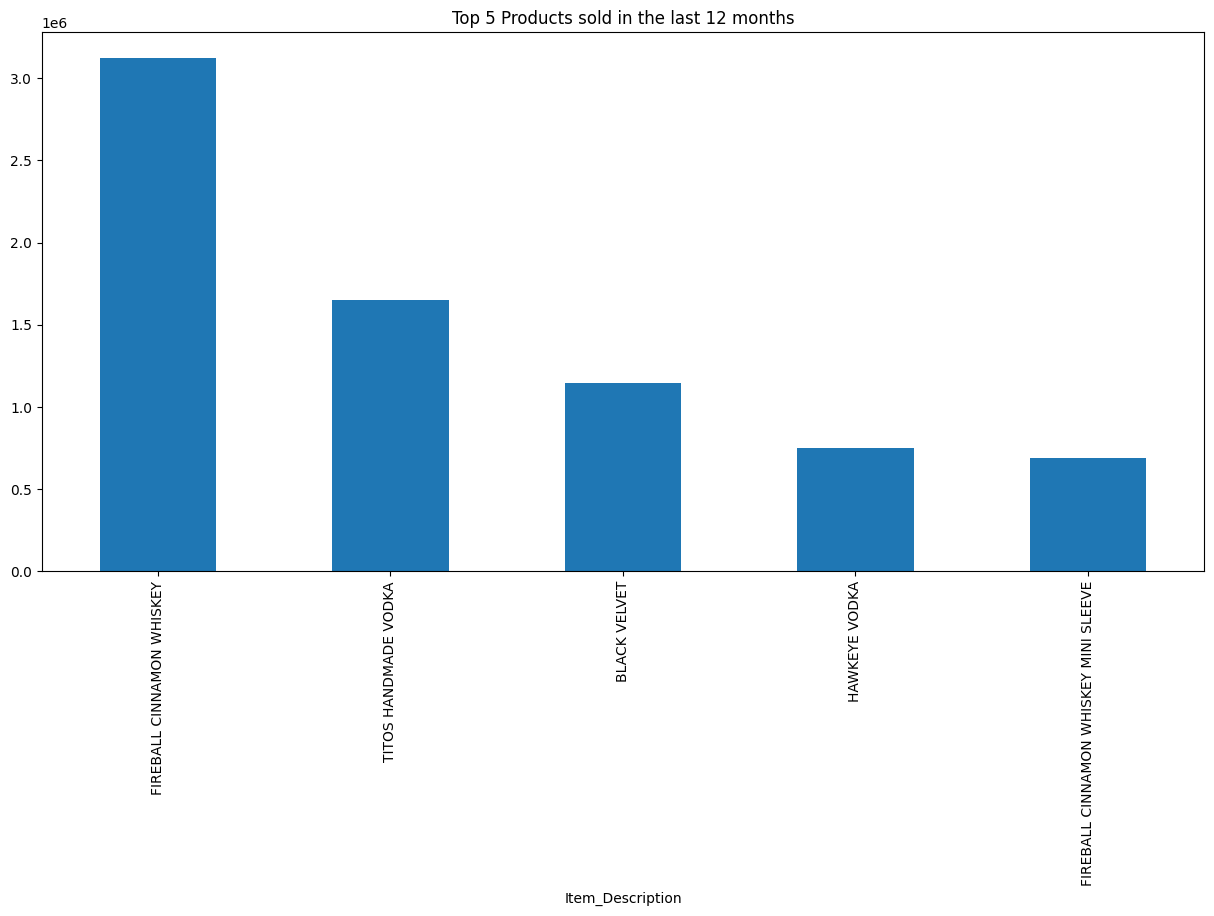

In [17]:
# Create bar chart for top 5 products sold in the last 12 months
df3 = BottlesSold[:5]
df3.plot(kind = "bar", title = "Top 5 Products sold in the last 12 months", figsize = (15,7))

- Answer: Fireball Cinnamon Whiskey sold the most in the past 12 months

### Which product sold the least in the past 12 months?

- Answer: HA Last Drop Straight Whiskey and HA Middleton Silent Distillery Chapter 4 are among the least products sold in the last 12 months

In [18]:
df2[(df.Item_Description == "HA LAST DROP STRAIGHT WHISKEY  20YR 700ML & 50ML")]

/tmp/ipykernel_873/85313971.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[(df.Item_Description == "HA LAST DROP STRAIGHT WHISKEY  20YR 700ML & 50ML")]


,Date,Store_Number,Store_Name,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,...,Item_Description,Pack,Bottle_Volume,Bottle_Cost,Bottle_Retail,Bottles_Sold,Sale,Year,Month,Month-Year
5392872,2023-10-18,4161,FAREWAY STORES #950 / IOWA CITY,IOWA CITY,52246.0,00,JOHNSON,1012200.0,SCOTCH WHISKIES,421.0,...,HA LAST DROP STRAIGHT WHISKEY 20YR 700ML & 50ML,1.0,750.0,2000.0,3000.0,1.0,3000.0,2023,10,2023-10


### What products are most popular seasonally?

In [19]:
#Selecting necessary columns.
df2 = df2[["Item_Number", "Item_Description", "Month", "Year", "Sale", "Bottles_Sold","County"]]
df2

,Item_Number,Item_Description,Month,Year,Sale,Bottles_Sold,County
3251726,28866.0,TANQUERAY GIN,4,2023,83.96,4.0,POLK
3251729,36306.0,HAWKEYE VODKA,4,2023,31.50,6.0,POLK
3251731,88294.0,PATRON SILVER,4,2023,45.00,2.0,POLK
3251732,43127.0,BACARDI SUPERIOR,11,2023,171.00,12.0,SCOTT
3251734,89230.0,1800 ANEJO,11,2023,103.50,3.0,SCOTT
...,...,...,...,...,...,...,...
6806638,28276.0,JIM BEAM PEACH,3,2023,100.80,48.0,DES MOINES
6806639,43331.0,CAPTAIN MORGAN ORIGINAL SPICED MINI,3,2023,259.20,36.0,WEBSTER
6806641,26906.0,JACK DANIELS SINGLE BARREL,3,2023,126.00,3.0,HUMBOLDT
6806642,20248.0,OLD CROW,3,2023,94.50,6.0,POLK


In [20]:

df2.Month.value_counts().sort_index()

Month
1     212908
2     189443
3     221548
4     198640
5     233308
6     248058
7     209222
8     230389
9     209211
10    221285
11    223693
12    241651
Name: count, dtype: int64

In [21]:
# Create Season_Month column based on the values in the "Month" column.
def get_season(Month):
    if Month in [3, 4, 5]:
        return "Spring"
    elif Month in [6, 7, 8]:
        return "Summer"
    elif Month in [9, 10, 11]:
        return "Fall"
    else:
        return "Winter"
df2["Season_Month"] = df2.Month.apply(get_season)

df2[["Item_Number", "Item_Description", "Month", "Year", "Sale", "Season_Month"]]
df2.head()

,Item_Number,Item_Description,Month,Year,Sale,Bottles_Sold,County,Season_Month
3251726,28866.0,TANQUERAY GIN,4,2023,83.96,4.0,POLK,Spring
3251729,36306.0,HAWKEYE VODKA,4,2023,31.50,6.0,POLK,Spring
3251731,88294.0,PATRON SILVER,4,2023,45.00,2.0,POLK,Spring
3251732,43127.0,BACARDI SUPERIOR,11,2023,171.00,12.0,SCOTT,Fall
3251734,89230.0,1800 ANEJO,11,2023,103.50,3.0,SCOTT,Fall


In [22]:
#Top 5 Product Sales Seasonally
from ipywidgets import widgets, interactive, Layout

w_season = widgets.ToggleButtons(
    options=['All','Spring', 'Summer', 'Fall', 'Winter'],
    value='Spring',
    description='Seasonal',
    style = {"description_width": '50px'},
    layout = Layout(width="30%")
)

def view(season):
    if season == "All":
        df2tmp = df2
    else:
        df2tmp = df2[df2.Season_Month == season]
    #display(df2tmp)
    Sale = df2tmp.groupby("Item_Description").Sale.sum().sort_values(ascending=False)
    Top5_Sale = Sale[:5]
    Top5_Sale.plot(kind="bar", title="Top 5 Sales Seasonally", figsize=(15,5))

i = interactive(view, season=w_season)
display(i)

interactive(children=(ToggleButtons(description='Seasonal', index=1, layout=Layout(width='30%'), options=('All…

In [23]:
#Check the interactive code
dfcheck = df2[(df2.Season_Month == "Winter")]
dfcheck_sold = dfcheck.groupby("Item_Description").Sale.sum().sort_values(ascending=False)
dfcheck_sold[:5]

Item_Description
TITOS HANDMADE VODKA               6616041.38
BLACK VELVET                       3574544.76
FIREBALL CINNAMON WHISKEY          2737327.00
CROWN ROYAL                        2408950.07
JACK DANIELS OLD #7 BLACK LABEL    2362261.17
Name: Sale, dtype: float64

In [24]:
#Top 5 Product Bottles_Sold Seanonally
from ipywidgets import widgets, interactive, Layout

w_season = widgets.ToggleButtons(
    options=['All','Spring', 'Summer', 'Fall', 'Winter'],
    value='Spring',
    description='Seasonal',
    style = {"description_width": '50px'},
    layout = Layout(width="30%")
)

def view(season):
    if season == "All":
        df2tmp = df2
    else:
        df2tmp = df2[df2.Season_Month == season]
    Bottlesold = df2tmp.groupby("Item_Description").Bottles_Sold.sum().sort_values(ascending=False)
    Top5_Bottlesold = Bottlesold[:5]
    Top5_Bottlesold.plot(kind="bar", title="Top 5 Bottles_Sold Seasonally", figsize=(15,5))

i = interactive(view, season=w_season)
display(i)

interactive(children=(ToggleButtons(description='Seasonal', index=1, layout=Layout(width='30%'), options=('All…

### Which product sold the most during the holiday season?

In [25]:
#Holiday season--Nov to Jan
df_holiday = df2[df2["Month"].isin([11, 12, 1])]     #Filter months 11, 12, and 1
df_holiday

,Item_Number,Item_Description,Month,Year,Sale,Bottles_Sold,County,Season_Month
3251732,43127.0,BACARDI SUPERIOR,11,2023,171.00,12.0,SCOTT,Fall
3251734,89230.0,1800 ANEJO,11,2023,103.50,3.0,SCOTT,Fall
3251735,89388.0,JUAREZ GOLD,11,2023,144.00,6.0,JOHNSON,Fall
3251739,67266.0,YUKON JACK,11,2023,166.56,12.0,WRIGHT,Fall
3251744,89388.0,JUAREZ GOLD,11,2023,144.00,6.0,LEE,Fall
...,...,...,...,...,...,...,...,...
5262523,82846.0,DEKUYPER LUSCIOUS PEACHTREE,1,2024,20.26,2.0,BLACK HAWK,Winter
5262524,76831.0,SMIRNOFF BLUE RASPBERRY MINI,1,2024,134.52,12.0,LINN,Winter
5262525,8828.0,LAUDERS,1,2024,103.50,6.0,LINN,Winter
5262526,77779.0,WILD TURKEY AMERICAN HONEY,1,2024,193.50,6.0,LINN,Winter


In [26]:
df_holiday.Month.value_counts().sort_index()

Month
1     212908
11    223693
12    241651
Name: count, dtype: int64

In [27]:
#Top 5 Product Bottles Sold during Holiday season
Holiday_BS = df_holiday.groupby("Item_Description").Bottles_Sold.sum().sort_values(ascending=False)
Holiday_BS[:5]

Item_Description
FIREBALL CINNAMON WHISKEY                798126.0
TITOS HANDMADE VODKA                     381405.0
BLACK VELVET                             272670.0
HAWKEYE VODKA                            188652.0
FIREBALL CINNAMON WHISKEY MINI SLEEVE    176264.0
Name: Bottles_Sold, dtype: object

<Axes: title={'center': 'Top 5 Product Bottles Sold during Holiday Season'}, xlabel='Item_Description'>

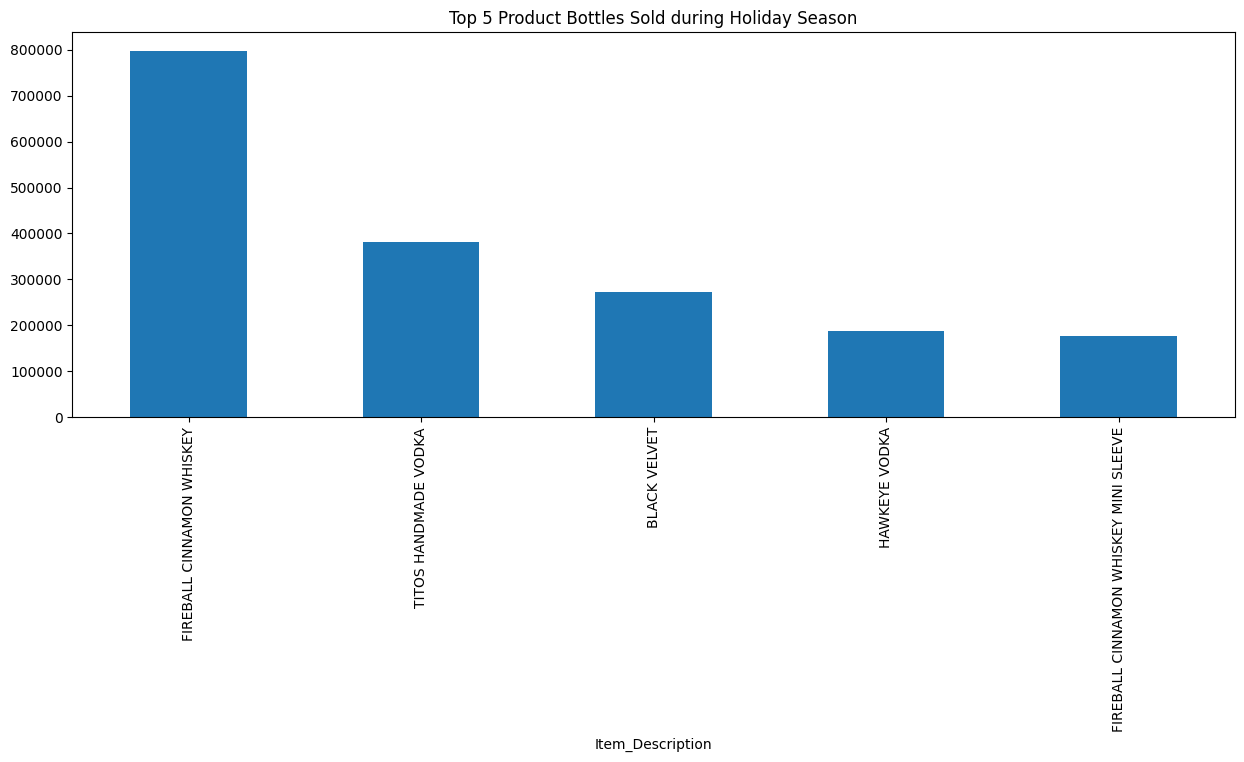

In [28]:
#Data Visualization
Top5_Holiday_BS = Holiday_BS[:5]
Top5_Holiday_BS.plot(kind="bar", title="Top 5 Product Bottles Sold during Holiday Season", figsize=(15,5))

FIREBALL CINNAMON WHISKEY sold the most bottles during the holiday seson 

<Axes: title={'center': 'Top 5 Product Sale during Holiday Season'}, xlabel='Item_Description'>

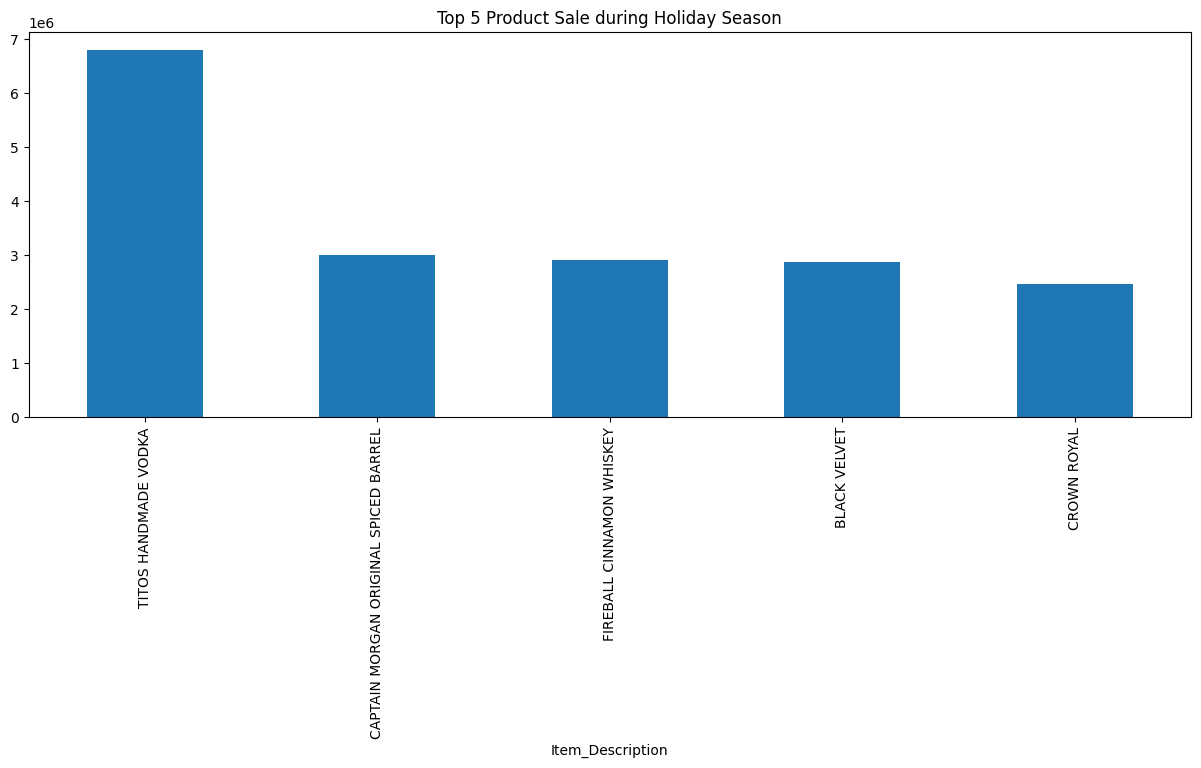

In [29]:
#Top 5 Product Sale during holiday season
Holiday_Sale = df_holiday.groupby("Item_Description").Sale.sum().sort_values(ascending=False)
Top5_Holiday_Sale = Holiday_Sale[:5]
Top5_Holiday_Sale.plot(kind="bar", title="Top 5 Product Sale during Holiday Season", figsize=(15,5))

TITOS HANDMADE VODKA had the most sale during the holiday season

### Are hard alcohol sales trending up or down in Iowa?

In [30]:
# Set years to 5 year period from 2019 to 2023 
df = df[df["Year"]>=2019]
df_h = df[df["Year"]<2024]
df_h

,Date,Store_Number,Store_Name,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,...,Item_Description,Pack,Bottle_Volume,Bottle_Cost,Bottle_Retail,Bottles_Sold,Sale,Year,Month,Month-Year
57427,2019-03-21,3670,WAL-MART 2827 / CORALVILLE,CORALVILLE,52241,52.0,JOHNSON,1031100.0,AMERICAN VODKAS,255.0,...,SEAGRAMS EXTRA SMOOTH VODKA,6.0,1750.0,10.00,15.00,6.0,90.00,2019,3,2019-03
57866,2019-03-12,2524,HY-VEE FOOD STORE / DUBUQUE,DUBUQUE,52001,31.0,DUBUQUE,1032200.0,IMPORTED FLAVORED VODKA,370.0,...,ABSOLUT APEACH,12.0,750.0,11.49,17.24,4.0,68.96,2019,3,2019-03
59313,2019-03-25,4829,CENTRAL CITY 2,DES MOINES,50314,77.0,POLK,1032100.0,IMPORTED VODKAS,35.0,...,GREY GOOSE,6.0,1000.0,22.50,33.75,60.0,2025.00,2019,3,2019-03
60453,2019-03-15,2178,DOUBLE D LIQUOR STORE,WAUKON,52172,3.0,ALLAMAKEE,1031100.0,AMERICAN VODKAS,434.0,...,HAWKEYE VODKA,6.0,1750.0,7.17,10.76,18.0,193.68,2019,3,2019-03
60757,2019-03-27,2614,HY-VEE #3 FOOD & DRUGSTORE / DAVENPORT,DAVENPORT,52807,82.0,SCOTT,1032100.0,IMPORTED VODKAS,115.0,...,SVEDKA 80PRF,12.0,750.0,8.25,12.38,12.0,148.56,2019,3,2019-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11493950,2021-08-06,3825,SHOP N SAVE #2 / E 14TH,DES MOINES,50316.0,77.0,POLK,1022200.0,100% AGAVE TEQUILA,395.0,...,1800 SILVER,12.0,375.0,8.96,13.44,12.0,161.28,2021,8,2021-08
11493951,2021-08-10,5150,CASEY'S GENERAL STORE #2815 / VICT,VICTOR,52347.0,79.0,POWESHIEK,1031100.0,AMERICAN VODKAS,260.0,...,SMIRNOFF 80PRF,12.0,750.0,8.25,12.38,6.0,74.28,2021,8,2021-08
11493952,2021-08-06,4136,FAREWAY STORES #983 / GRIMES,GRIMES,50111.0,77.0,POLK,1032200.0,IMPORTED FLAVORED VODKA,260.0,...,KETEL ONE BOTANICAL CUCUMBER & MINT,12.0,750.0,11.33,17.00,12.0,204.00,2021,8,2021-08
11493953,2021-08-06,4334,FAREWAY STORES #114 / DUBUQUE,DUBUQUE,52001.0,31.0,DUBUQUE,1012100.0,CANADIAN WHISKIES,260.0,...,CROWN ROYAL REGAL APPLE,12.0,750.0,16.59,24.89,24.0,597.36,2021,8,2021-08


In [31]:
# Grouping the sum of all bottles sold by year from 5 year period of 2019 to 2023
Bottles_Sold_by_year = df_h.groupby("Year").Bottles_Sold.sum()/1000000
Bottles_Sold_by_year

Year
2019    23.060486
2020    29.841264
2021    18.182965
2022    13.712071
2023    31.263866
Name: Bottles_Sold, dtype: object

/tmp/ipykernel_873/695001582.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Bottles_Sold_by_year.plot(kind="pie", title="Number of Hard Liquor Bottles Sold in Iowa By Year (In Millions)", figsize=(5,5), autopct='%.1f', fontsize=8)


<Axes: title={'center': 'Number of Hard Liquor Bottles Sold in Iowa By Year (In Millions)'}, ylabel='Bottles_Sold'>

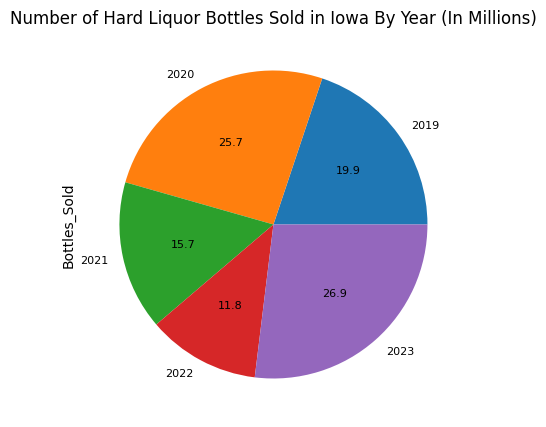

In [32]:
# Expressing the data as a pie chart with 2 notably high liqour sales years (2020 and 2023) 
Bottles_Sold_by_year.plot(kind="pie", title="Number of Hard Liquor Bottles Sold in Iowa By Year (In Millions)", figsize=(5,5), autopct='%.1f', fontsize=8)

<Axes: title={'center': 'Number of Hard Liquor Bottles Sold in Iowa By Year (In Millions)'}, xlabel='Year'>

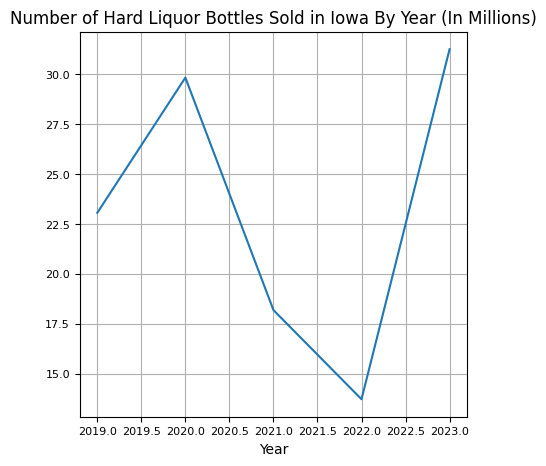

In [33]:
# Expressing the data as a line chart with an upward trend in 2023
Bottles_Sold_by_year.plot(kind="line", title="Number of Hard Liquor Bottles Sold in Iowa By Year (In Millions)", figsize=(5,5), grid = True, fontsize=8)

### Which product sold the most locally during the holiday season (by bottles sold in Ida County, Iowa 2023)?

In [34]:
# Selecting the neccessary columns
df10 = df2[["Item_Number", "Item_Description", "Month", "Year", "Bottles_Sold", "Sale", "County"]]
df10

,Item_Number,Item_Description,Month,Year,Bottles_Sold,Sale,County
3251726,28866.0,TANQUERAY GIN,4,2023,4.0,83.96,POLK
3251729,36306.0,HAWKEYE VODKA,4,2023,6.0,31.50,POLK
3251731,88294.0,PATRON SILVER,4,2023,2.0,45.00,POLK
3251732,43127.0,BACARDI SUPERIOR,11,2023,12.0,171.00,SCOTT
3251734,89230.0,1800 ANEJO,11,2023,3.0,103.50,SCOTT
...,...,...,...,...,...,...,...
6806638,28276.0,JIM BEAM PEACH,3,2023,48.0,100.80,DES MOINES
6806639,43331.0,CAPTAIN MORGAN ORIGINAL SPICED MINI,3,2023,36.0,259.20,WEBSTER
6806641,26906.0,JACK DANIELS SINGLE BARREL,3,2023,3.0,126.00,HUMBOLDT
6806642,20248.0,OLD CROW,3,2023,6.0,94.50,POLK


In [35]:
# Create Season_Month column based on the values in the "Month" column using a user defined function
def get_hollidays(Month):
    if Month in [10, 11, 12]:
        return "Hollidays"
    else:
        return "Other"
df10["Hollidays"] = df10.Month.apply(get_hollidays)

df10[["Item_Number", "Item_Description", "Month", "Year", "Bottles_Sold", "County", "Hollidays"]]
df10.head()

,Item_Number,Item_Description,Month,Year,Bottles_Sold,Sale,County,Hollidays
3251726,28866.0,TANQUERAY GIN,4,2023,4.0,83.96,POLK,Other
3251729,36306.0,HAWKEYE VODKA,4,2023,6.0,31.50,POLK,Other
3251731,88294.0,PATRON SILVER,4,2023,2.0,45.00,POLK,Other
3251732,43127.0,BACARDI SUPERIOR,11,2023,12.0,171.00,SCOTT,Hollidays
3251734,89230.0,1800 ANEJO,11,2023,3.0,103.50,SCOTT,Hollidays


In [36]:
# Creating the a new frame sorting for only Holliday sales in Ida County
Holliday_Liquors = df10[(df10.Hollidays == "Hollidays") & (df10.County == "POLK")]
Holliday_Liquors

,Item_Number,Item_Description,Month,Year,Bottles_Sold,Sale,County,Hollidays
3251758,37665.0,ROW VODKA,11,2023,6.0,109.98,POLK,Hollidays
3251811,88548.0,HORNITOS PLATA,11,2023,12.0,270.00,POLK,Hollidays
3251882,64529.0,BUMBU RUM,11,2023,18.0,499.50,POLK,Hollidays
3251967,87510.0,1800 SILVER,11,2023,12.0,297.00,POLK,Hollidays
3251986,66518.0,RUMHAVEN,11,2023,12.0,161.88,POLK,Hollidays
...,...,...,...,...,...,...,...,...
5484098,87410.0,JOSE CUERVO ESPECIAL SILVER,10,2023,6.0,207.00,POLK,Hollidays
5484102,86843.0,OLE SMOKY SALTY CARAMEL WHISKEY,10,2023,12.0,198.00,POLK,Hollidays
5484111,27102.0,TEMPLETON RYE 4YR,10,2023,1.0,27.14,POLK,Hollidays
5484119,39422.0,NEW AMSTERDAM PINK WHITNEY MINI,10,2023,12.0,83.04,POLK,Hollidays


In [37]:
# Sorting the 5 most popular items by bottles sold
Holliday_Liquors = Holliday_Liquors.groupby("Item_Description").Bottles_Sold.sum()
Holliday_Liquors = Holliday_Liquors.sort_values(ascending=False).head(10)
Holliday_Liquors

Item_Description
FIREBALL CINNAMON WHISKEY                233099.0
TITOS HANDMADE VODKA                     101664.0
BLACK VELVET                              43401.0
MCCORMICK 80PRF VODKA PET                 33169.0
CAPTAIN MORGAN ORIGINAL SPICED            31388.0
HAWKEYE VODKA                             31039.0
FIREBALL CINNAMON WHISKEY MINI SLEEVE     28514.0
BLUE OX VODKA                             26859.0
HENNESSY VS                               24990.0
CROWN ROYAL REGAL APPLE                   23871.0
Name: Bottles_Sold, dtype: object

<Axes: title={'center': 'Most Popular Holiday Liquors in Ida County, Iowa'}, ylabel='Item_Description'>

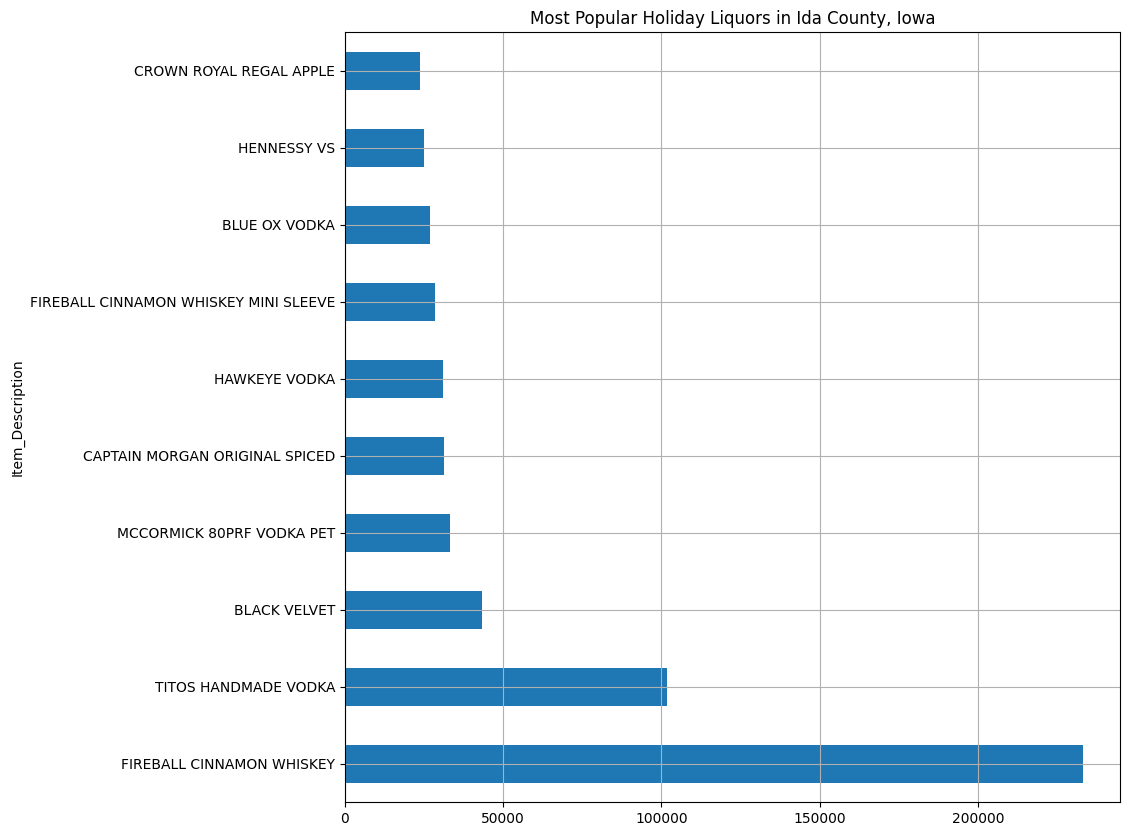

In [38]:
# Plotting the holliday sales (Notice that Fireball is much more popluar during the hollidays in Ida County, while Black Velvet seems to be the favorite the rest of the year
Holliday_Liquors.plot(kind="barh", title="Most Popular Holiday Liquors in Ida County, Iowa", grid=True, figsize=(10,10))

### How does this compare to non-holiday months in Ida county?

In [39]:
# Plotting the non-holliday sales (Notice that Fireball is much more popluar during the hollidays in Ida County, while Black Velvet seems to be the favorite the rest of the year
Non_Holliday_Liquors = df10[(df10.Hollidays == "Other")& (df10.County == "IDA")]
Non_Holliday_Liquors

,Item_Number,Item_Description,Month,Year,Bottles_Sold,Sale,County,Hollidays
3252262,15627.0,JAMESON,2,2023,3.0,94.41,IDA,Other
3252490,65427.0,LICOR 43 ORIGINAL LIQUEUR,4,2023,12.0,324.00,IDA,Other
3252577,26827.0,JACK DANIELS OLD #7 BLACK LABEL,4,2023,12.0,364.92,IDA,Other
3252819,27544.0,RED STAG BLACK CHERRY,4,2023,4.0,66.00,IDA,Other
3252903,55246.0,ARROW WILD CHERRY BRANDY,4,2023,2.0,17.26,IDA,Other
...,...,...,...,...,...,...,...,...
6787661,43338.0,CAPTAIN MORGAN ORIGINAL SPICED,3,2023,6.0,162.00,IDA,Other
6787711,38177.0,TITOS HANDMADE VODKA,3,2023,12.0,237.12,IDA,Other
6787835,35918.0,FIVE O'CLOCK VODKA,3,2023,6.0,67.50,IDA,Other
6787979,67527.0,KAHLUA COFFEE,3,2023,4.0,113.96,IDA,Other


In [40]:
#Creating the a new frame sorting for only Holliday sales in Ida County
Non_Holliday_Liquors = Non_Holliday_Liquors.groupby("Item_Description").Bottles_Sold.sum()
Non_Holliday_Liquors = Non_Holliday_Liquors.sort_values(ascending=False).head(10)
Non_Holliday_Liquors

Item_Description
BLACK VELVET                      3639.0
TITOS HANDMADE VODKA              2164.0
HAWKEYE VODKA                     1457.0
CAPTAIN MORGAN ORIGINAL SPICED    1291.0
FIREBALL CINNAMON WHISKEY         1287.0
CROWN ROYAL REGAL APPLE           1193.0
FIVE O'CLOCK VODKA                1092.0
CROWN ROYAL                       1027.0
DR MCGILLICUDDYS CHERRY            571.0
MCCORMICK 80PRF VODKA PET          524.0
Name: Bottles_Sold, dtype: object

<Axes: title={'center': 'Most Popular Liquors Outside of the Holiday Season in Ida County, Iowa'}, ylabel='Item_Description'>

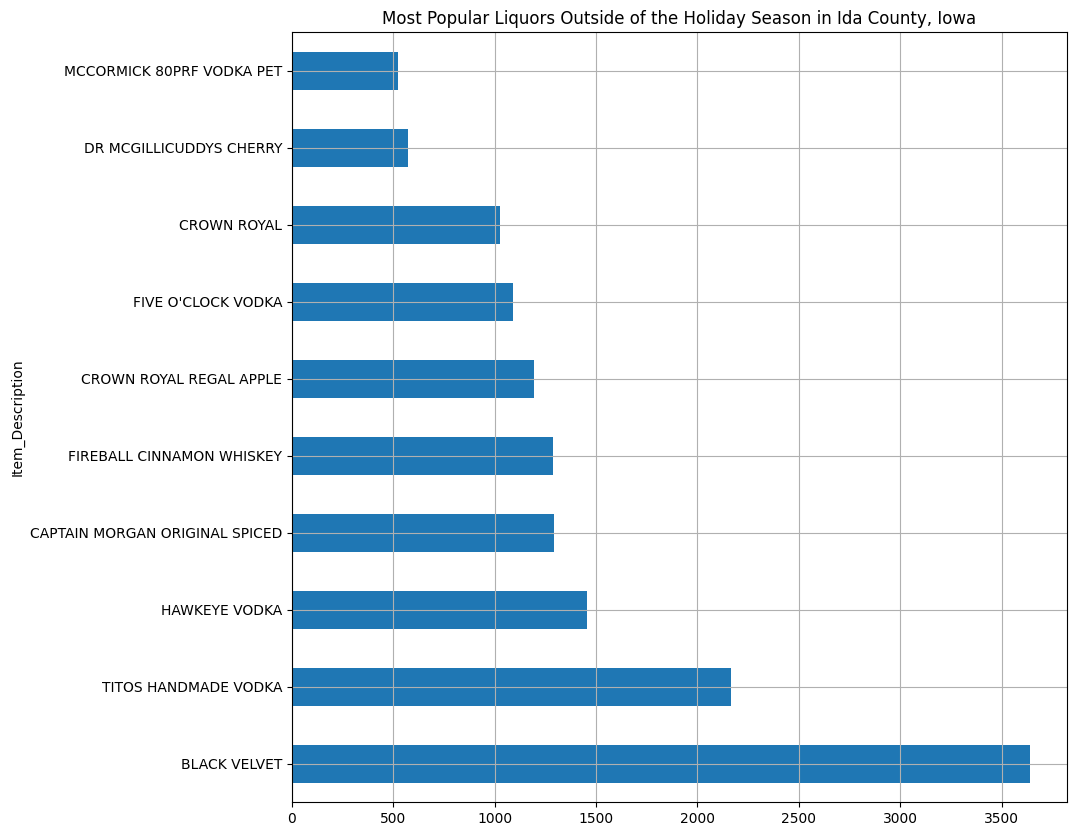

In [41]:
Non_Holliday_Liquors.plot(kind="barh", title="Most Popular Liquors Outside of the Holiday Season in Ida County, Iowa", grid=True, figsize=(10,10))

### Is there any correlation to external factors like dates or area?

In [42]:
# Only looking at top 3 products by month
monthly_product_sales = df.groupby(["Month", "Item_Description"])["Bottles_Sold"].sum()
monthly_product_sales = monthly_product_sales.astype(int)

bestseller = (monthly_product_sales.groupby("Month", group_keys=False).nlargest(3))

print("Top 3 best-selling products in each month:")
bestseller

Top 3 best-selling products in each month:


Month  Item_Description         
1      FIREBALL CINNAMON WHISKEY     893611
       TITOS HANDMADE VODKA          387009
       BLACK VELVET                  310173
2      FIREBALL CINNAMON WHISKEY     634538
       BLACK VELVET                  359971
       TITOS HANDMADE VODKA          277390
3      FIREBALL CINNAMON WHISKEY     772837
       TITOS HANDMADE VODKA          348658
       BLACK VELVET                  323408
4      FIREBALL CINNAMON WHISKEY    1002391
       TITOS HANDMADE VODKA          491140
       BLACK VELVET                  431052
5      FIREBALL CINNAMON WHISKEY     763935
       BLACK VELVET                  527085
       TITOS HANDMADE VODKA          459275
6      FIREBALL CINNAMON WHISKEY     655185
       TITOS HANDMADE VODKA          439470
       BLACK VELVET                  279591
7      FIREBALL CINNAMON WHISKEY     726762
       BLACK VELVET                  447785
       TITOS HANDMADE VODKA          444016
8      FIREBALL CINNAMON WHISKEY     746615

<Axes: title={'center': 'Top 3 Bestsellers'}, ylabel='Month,Item_Description'>

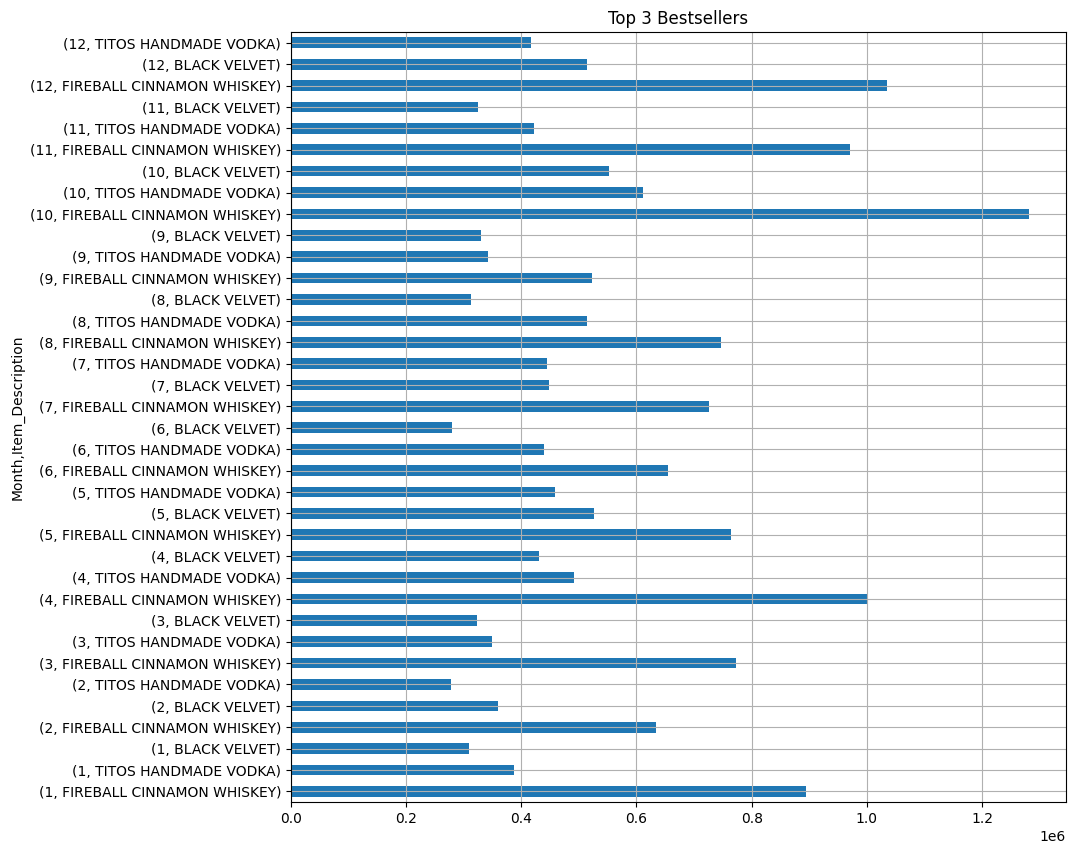

In [43]:
bestseller.plot(kind="barh", title="Top 3 Bestsellers", grid=True, figsize=(10,10))

The month with the highest sales is October. There are several reasons why it can have the highest liquor sales. Seasonal events such as Halloween parties and Thanksgiving can contribute to the sales. Not to mention, Oktoberfest is also held in October. These events often involve gathering that involve alcohol consumption which can contribute to higher liquor store sales.

### TOTAL BOTTLES SOLD BY YEAR

In [44]:
bottlessoldyear = df.groupby("Year")['Bottles_Sold'].sum()
bottlessoldyear

Year
2019    23060486.0
2020    29841264.0
2021    18182965.0
2022    13712071.0
2023    31263866.0
2024     2377520.0
Name: Bottles_Sold, dtype: object

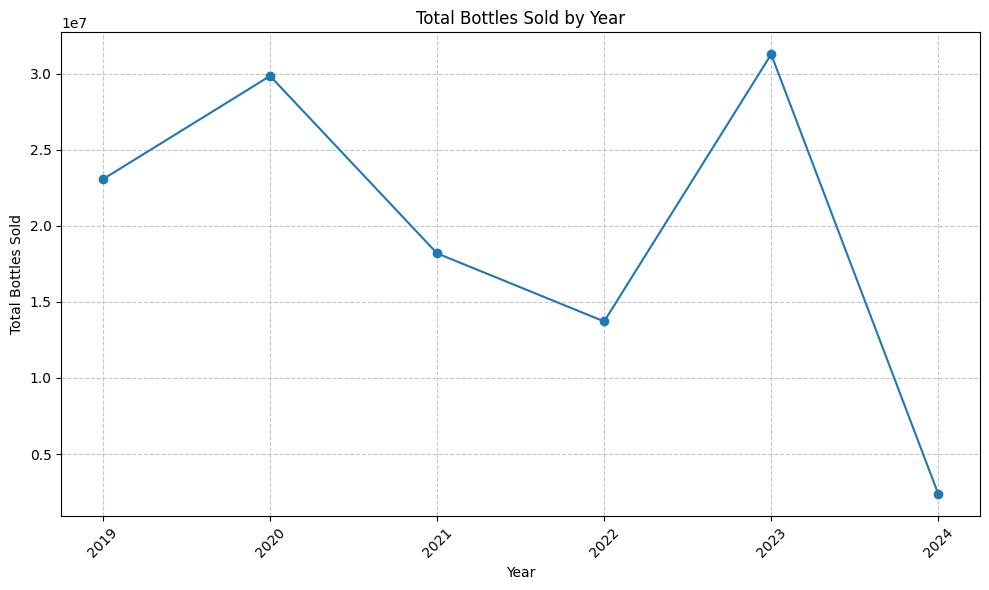

In [45]:
# Graphing the data above to show liquor sales dynamics across different years
import matplotlib.pyplot as plt
bottlesbyyear = df.groupby("Year")["Bottles_Sold"].sum()

# Plot the graph
plt.figure(figsize=(10, 6))
bottlesbyyear.plot(kind="line", marker="o")
plt.title("Total Bottles Sold by Year")
plt.xlabel("Year")
plt.ylabel("Total Bottles Sold")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#### Potential factors contributing to the variations in liquor sales for each year.

2019: Strong economy and positive consumer sentiment likely led to high liquor sales.

2020: COVID-19 pandemic triggered lockdowns, leading to increased at-home consumption and panic buying, resulting in a significant spike in liquor sales.

2021: As lockdowns eased and social activities resumed, liquor sales decreased slightly due to changes in consumer behavior. Global supply chains were also still being affected by the pandemic that lead to supply shortages.

2022: Continuation of changing consumer preferences and economic uncertainties likely contributed to a further decline in liquor sales.

2023: Economic recovery and increased consumer confidence likely drove liquor sales growth.

2024: Limited data available, the year is not yet completed thus very low "sales".

### TOP 10 COUNTIES WITH THE MOST BOTTLES SOLD

In [46]:
# Looking for the top 10 counties with highest bottles sold
top10county = df.groupby("County").Bottles_Sold.sum().astype(int).nlargest(10)

print("Top 10 Counties with the most sold bottles:")
top10county

Top 10 Counties with the most sold bottles:


County
POLK             26894832
LINN             10641952
SCOTT             8859253
BLACK HAWK        6896363
JOHNSON           6101698
POTTAWATTAMIE     4688117
WOODBURY          4283080
DUBUQUE           3330444
STORY             3145191
CERRO GORDO       2449494
Name: Bottles_Sold, dtype: int64

### BOTTOM 10 COUNTIES WITH THE LEAST BOTTLES SOLD

In [47]:
# Looking for the bottom 10 counties with least bottles sold
bottom10county = df.groupby("County").Bottles_Sold.sum().astype(int).nsmallest(10)

print("Bottom 10 Counties with the least sold bottles:")
print(bottom10county)

Bottom 10 Counties with the least sold bottles:
County
DAVIS        43770
FREMONT      47945
TAYLOR       53676
RINGGOLD     56735
ADAMS        58826
WAYNE        62932
unknown      63932
DECATUR      69641
VAN BUREN    69874
AUDUBON      76322
Name: Bottles_Sold, dtype: int64


Polk County placed first for the Top 10 Counties with the most sold bottles, and Davis County at the bottom with the least sold bottles.

Polk County in Iowa likely has higher liquor sales than Davis County due to factors such as its larger population, more economic activity, urban environment, and potentially higher tourism and events. These factors typically contribute to increased demand and sales of alcohol compared to rural areas like Davis County. Davis County has a smaller land area and less stores which are possible factors that play a part on its sales.

### Which liquor product will sell the most over the next 12 months?

In [48]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
df = df.drop(columns=['Date'])



# Convert 'Bottles_Sold' column to numeric data type
df['Bottles_Sold'] = pd.to_numeric(df['Bottles_Sold'], errors='coerce')

# Filter the data for the last 2 years
current_year = pd.to_datetime('today').year
filtered_data = df[df['Year'] >= current_year - 3]

# Exclude columns with object data type from features
exclude_columns = ['Store_Name', 'Store_Number','City', 'Zip_Code', 'County_Number', 'County', 'Category', 'Category_Name', 'Vendor_Name', 'Month-Year','Month']
X = filtered_data.drop(['Bottles_Sold'] + exclude_columns, axis=1)

In [49]:
# Split the data into features (X) and target variable (y)
y = filtered_data['Bottles_Sold']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the categorical column using target encoding
encoder = TargetEncoder(cols=['Item_Description'])
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

# Create and train the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, random_state=42) 
model.fit(X_train_encoded, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [50]:

# Create future data
future_data = pd.DataFrame({
    'Store_Number': filtered_data['Store_Number'],
    'Store_Name': filtered_data['Store_Name'],
    'City': filtered_data['City'],
    'Zip_Code': filtered_data['Zip_Code'],
    'County_Number': filtered_data['County_Number'],
    'County': filtered_data['County'],
    'Category': filtered_data['Category'],
    'Category_Name': filtered_data['Category_Name'],
    'Vendor_Number': filtered_data['Vendor_Number'],
    'Vendor_Name': filtered_data['Vendor_Name'],
    'Item_Number': filtered_data['Item_Number'],
    'Item_Description': filtered_data['Item_Description'],
    'Pack': filtered_data['Pack'],
    'Bottle_Volume': filtered_data['Bottle_Volume'],
    'Bottle_Cost': filtered_data['Bottle_Cost'],
    'Bottle_Retail': filtered_data['Bottle_Retail'],
    #'Bottles_Sold': filtered_data['Bottles_Sold'],
    'Sale': filtered_data['Sale'],
    'Year': filtered_data['Year'],
    'Month-Year': filtered_data['Month-Year'],
    'Month': filtered_data['Month']
})




# Preprocess the future data using target encoding
future_data_encoded = encoder.transform(future_data.drop(exclude_columns, axis=1))

# Make predictions on the future data
predictions = model.predict(future_data_encoded)

# Combine the predictions with the corresponding product names
predicted_sold = {
    product: quantity
    for product, quantity in zip(future_data['Item_Description'], predictions)
}

product_totals = {}

# Iterate over the future data and update the total quantities for each product
for product, quantity in zip(future_data['Item_Description'], predictions):
    if product in product_totals:
        product_totals[product] += quantity
    else:
        product_totals[product] = quantity

# Display the product names and their corresponding total quantities
print("Product Sales Summary:")
for i, (product, quantity) in enumerate(sorted(product_totals.items(), key=lambda x: x[1], reverse=True)):
    rounded_quantity = round(quantity)
    print(f"{product}: {rounded_quantity}")
    if i == 19:
        show_more = input("Show the whole list? (y/n): ")
        if show_more.lower() == 'n':
            break

Product Sales Summary:
FIREBALL CINNAMON WHISKEY: 6371198
TITOS HANDMADE VODKA: 3133666
BLACK VELVET: 2426800
HAWKEYE VODKA: 1506008
CAPTAIN MORGAN ORIGINAL SPICED: 1321824
MCCORMICK 80PRF VODKA PET: 1216852
FIREBALL CINNAMON WHISKEY MINI SLEEVE: 1125048
CROWN ROYAL REGAL APPLE: 909838
CROWN ROYAL: 891094
HENNESSY VS: 800445
JACK DANIELS OLD #7 BLACK LABEL: 755385
MCCORMICK 80PRF VODKA: 676609
SMIRNOFF 80PRF: 650187
JIM BEAM: 632387
BLUE OX VODKA: 604701
PAUL MASSON GRANDE AMBER BRANDY VS: 567824
FIVE O'CLOCK VODKA: 562700
JAMESON: 530375
MALIBU COCONUT: 514458
ABSOLUT SWEDISH VODKA 80PRF: 480168


Show the whole list? (y/n):  y


JOSE CUERVO ESPECIAL REPOSADO: 465331
BARTON VODKA: 462381
ADMIRAL NELSON SPICED: 448980
NEW AMSTERDAM 80PRF: 443867
BACARDI SUPERIOR: 435621
FIREBALL CINNAMON WHISKEY PET: 419719
CAPTAIN MORGAN ORIGINAL SPICED BARREL: 419125
PATRON SILVER: 410251
SEAGRAMS 7 CROWN: 400061
FIVE STAR: 393516
99 BANANAS: 377267
CROWN ROYAL PEACH: 370187
JOSE CUERVO ESPECIAL SILVER: 361542
JAGERMEISTER LIQUEUR: 342054
E & J VS: 335264
FRIS DANISH VODKA: 317619
DR MCGILLICUDDYS CHERRY: 307217
SEAGRAMS EXTRA DRY GIN: 302592
BLACK VELVET TOASTED CARAMEL: 298053
HAWKEYE VODKA PET: 289704
GREY GOOSE: 287840
PLATINUM 7X VODKA: 280450
SMIRNOFF 80PRF PET: 276808
TORTILLA GOLD DSS: 271954
SOUTHERN COMFORT: 268730
MAKERS MARK: 243952
CAPTAIN MORGAN ORIGINAL SPICED PET: 239321
NIKOLAI VODKA: 226668
KIRKLAND SIGNATURE AMERICAN VODKA: 215380
SVEDKA 80PRF: 210838
PHILLIPS VODKA: 200523
BAILEYS ORIGINAL IRISH CREAM: 199856
NEW AMSTERDAM PINK WHITNEY: 197316
JUAREZ GOLD DSS: 195287
TANQUERAY GIN: 190805
JUAREZ GOLD: 19030

In [51]:
# Calculate the total quantity of bottles sold at the end of the 12 months
total_quantity_sold = int(sum(predictions))

# Calculate the total predicted amount of money from the predicted bottle retail
total_predicted_revenue = sum(predictions * future_data['Bottle_Retail'])

# Format the predicted revenue with commas for thousands separators and two decimal places
formatted_predicted_revenue = "${:,.2f}".format(total_predicted_revenue)

# Display the total quantity of bottles sold and the formatted predicted revenue
print("Sales Summary:")
print(f"Total Quantity Sold: {total_quantity_sold} bottles")
print(f"Total Predicted Revenue: {formatted_predicted_revenue}")

Sales Summary:
Total Quantity Sold: 65527622 bottles
Total Predicted Revenue: $924,802,283.46


In [52]:
# Sort the product_totals dictionary by values in descending order
sorted_product_totals = sorted(product_totals.items(), key=lambda x: x[1], reverse=True)
print("Top 10 Predicted Products and their Quantities:")
for product, quantity in sorted_product_totals[:10]:
    print(f"{product}: {quantity} bottles")

Top 10 Predicted Products and their Quantities:
FIREBALL CINNAMON WHISKEY: 6371198.0 bottles
TITOS HANDMADE VODKA: 3133665.75 bottles
BLACK VELVET: 2426800.0 bottles
HAWKEYE VODKA: 1506007.875 bottles
CAPTAIN MORGAN ORIGINAL SPICED: 1321824.25 bottles
MCCORMICK 80PRF VODKA PET: 1216852.25 bottles
FIREBALL CINNAMON WHISKEY MINI SLEEVE: 1125047.625 bottles
CROWN ROYAL REGAL APPLE: 909837.5625 bottles
CROWN ROYAL: 891094.125 bottles
HENNESSY VS: 800445.0 bottles


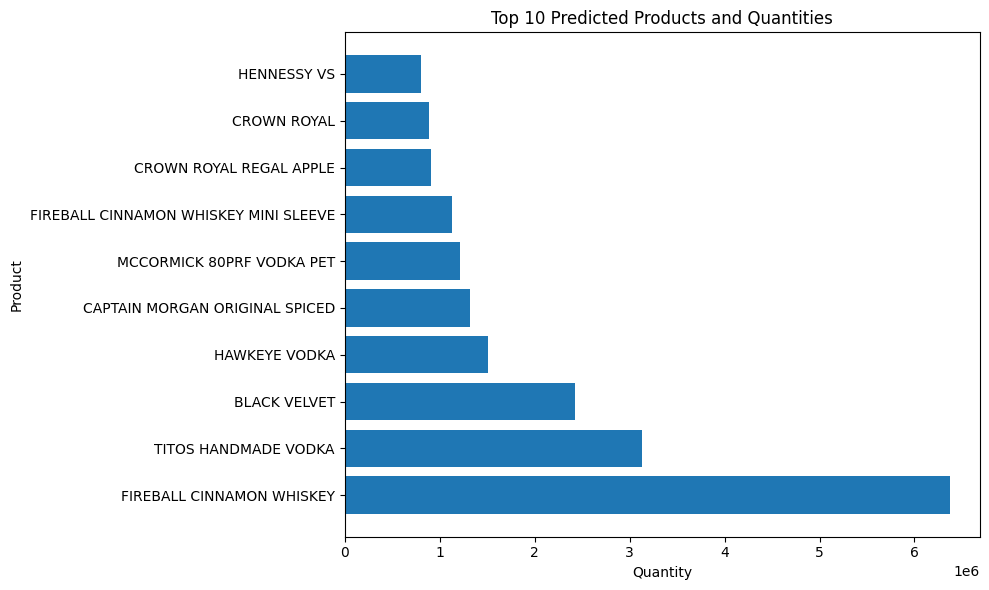

In [53]:
import matplotlib.pyplot as plt

# Sort the product_totals dictionary by values in descending order
sorted_product_totals = sorted(product_totals.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 products and quantities
top_10_products = [item[0] for item in sorted_product_totals[:10]]
top_10_quantities = [item[1] for item in sorted_product_totals[:10]]

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_products, top_10_quantities)
plt.xlabel('Quantity')
plt.ylabel('Product')
plt.title('Top 10 Predicted Products and Quantities')
plt.tight_layout()
plt.show()

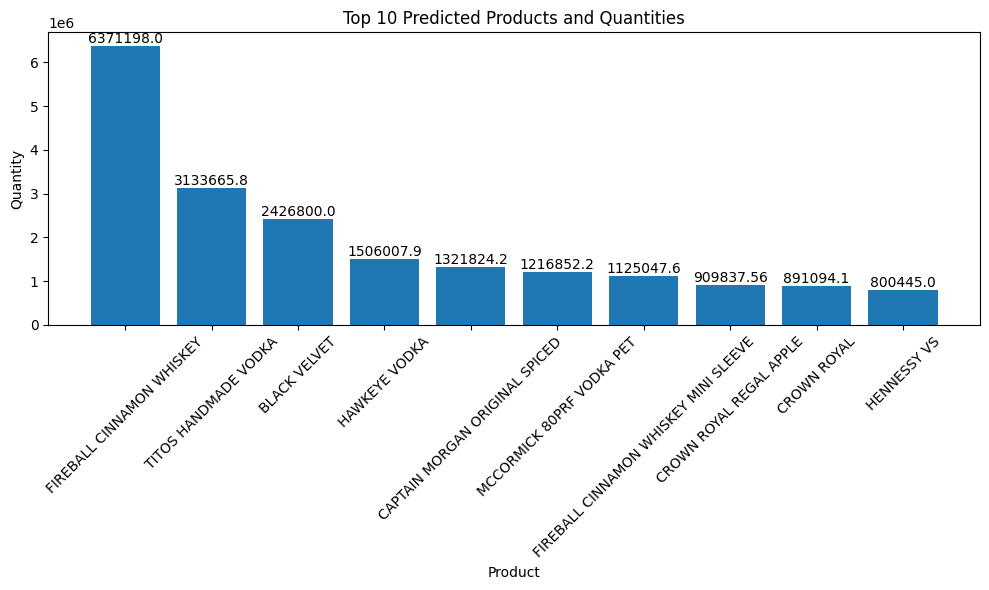

In [54]:
# Sort the product_totals dictionary by values in descending order
sorted_product_totals = sorted(product_totals.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 products and quantities
top_10_products = [item[0] for item in sorted_product_totals[:10]]
top_10_quantities = [item[1] for item in sorted_product_totals[:10]]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_products, top_10_quantities)
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('Top 10 Predicted Products and Quantities')
plt.xticks(rotation=45)

# Add the quantity values on top of the bars
for i, quantity in enumerate(top_10_quantities):
    plt.text(i, quantity, str(quantity), ha='center', va='bottom')

plt.tight_layout()
plt.show()

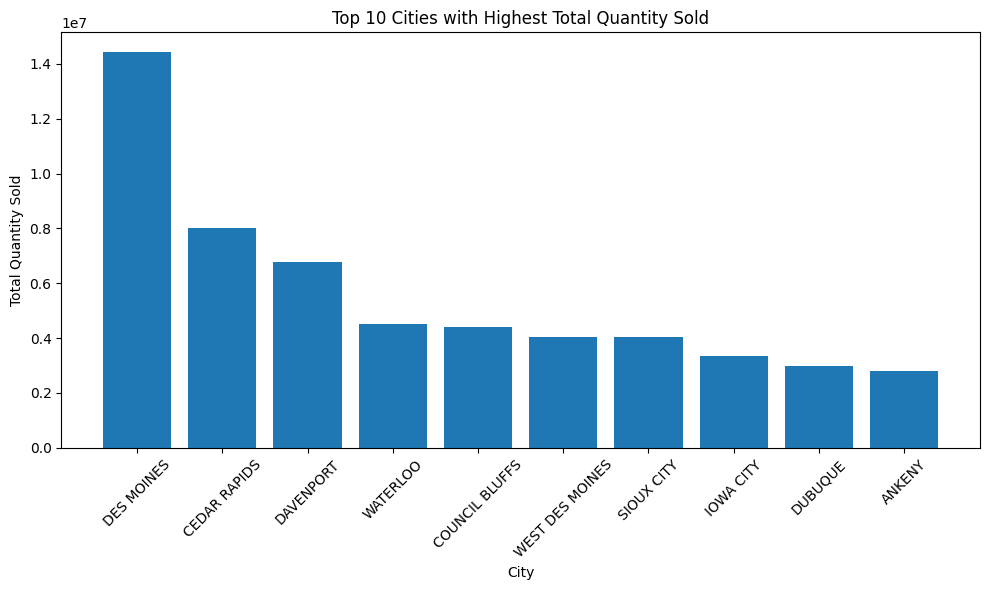

In [55]:
# Calculate the total quantity of bottles sold for each city
total_quantity_by_city = df.groupby('City')['Bottles_Sold'].sum()

# Sort the cities by total quantity of bottles sold in descending order
sorted_cities = total_quantity_by_city.sort_values(ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_cities.index, sorted_cities.values)
plt.xlabel('City')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Cities with Highest Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [56]:
# Calculate the total revenue for each city
total_revenue_by_city = df.groupby('City')['Bottles_Sold'].sum() * df.groupby('City')['Bottle_Retail'].mean()

# Sort the total revenue by city in descending order
sorted_revenue_by_city = total_revenue_by_city.sort_values(ascending=False)

# Display the top 20 cities and their revenues
print("Top 20 Cities by Revenue:")
for i, (city, revenue) in enumerate(sorted_revenue_by_city.items()):
    formatted_revenue = "${:,.2f}".format(revenue)
    print(f"City: {city}, Total Revenue: {formatted_revenue}")
    if i == 19:
        show_more = input("Show the rest of the cities? (y/n): ")
        if show_more.lower() == 'n':
            break

Top 20 Cities by Revenue:
City: DES MOINES, Total Revenue: $251,614,474.74
City: CEDAR RAPIDS, Total Revenue: $137,625,124.20
City: DAVENPORT, Total Revenue: $112,972,985.54
City: WEST DES MOINES, Total Revenue: $80,813,485.61
City: COUNCIL BLUFFS, Total Revenue: $73,081,339.99
City: WATERLOO, Total Revenue: $72,567,088.88
City: SIOUX CITY, Total Revenue: $69,634,337.25
City: IOWA CITY, Total Revenue: $59,301,994.95
City: ANKENY, Total Revenue: $53,440,446.58
City: AMES, Total Revenue: $50,917,377.21
City: DUBUQUE, Total Revenue: $50,048,643.90
City: CORALVILLE, Total Revenue: $39,235,010.73
City: CEDAR FALLS, Total Revenue: $36,903,751.47
City: MASON CITY, Total Revenue: $34,878,144.05
City: BETTENDORF, Total Revenue: $29,599,211.89
City: URBANDALE, Total Revenue: $28,877,613.68
City: MARSHALLTOWN, Total Revenue: $23,907,699.02
City: FORT DODGE, Total Revenue: $23,681,427.76
City: MUSCATINE, Total Revenue: $22,810,682.53
City: WINDSOR HEIGHTS, Total Revenue: $22,122,040.94


Show the rest of the cities? (y/n):  n


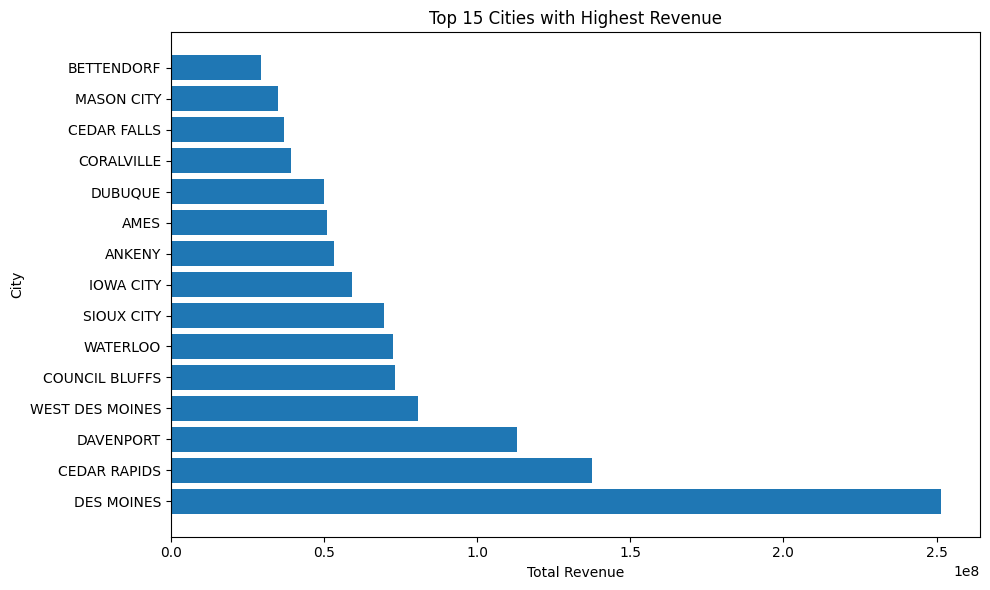

In [57]:
import matplotlib.pyplot as plt

# Calculate the total revenue for each city
total_revenue_by_city = df.groupby('City')['Bottles_Sold'].sum() * df.groupby('City')['Bottle_Retail'].mean()

# Sort the total revenue by city in descending order
sorted_revenue_by_city = total_revenue_by_city.sort_values(ascending=False).head(15)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_revenue_by_city.index, sorted_revenue_by_city.values)
plt.xlabel('Total Revenue')
plt.ylabel('City')
plt.title('Top 15 Cities with Highest Revenue')
plt.tight_layout()
plt.show()